In [1]:
%matplotlib inline
import numpy as np
import torch
import math
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

In [5]:
"""
下面以f(x)=x^2为例， 虽然我们知道最小化f(x)的解为x=0，

看一下梯度下降是如何工作的

使用x=10作为初始值，并设η=0.2。使用梯度下降对x迭代10次，可见最终x的值较接近最优解。
"""
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * 2 * x  # f(x) = x * x的导数为f'(x) = 2 * x
        results.append(x)
    print('epoch 10, x:', x)
    return results

res = gd(0.2)


epoch 10, x: 0.06046617599999997


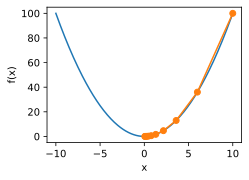

In [7]:
"""下面将绘制出自变量x的迭代轨迹。"""
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
    d2l.set_figsize()
    d2l.plt.plot(f_line, [x * x for x in f_line])
    d2l.plt.plot(res, [x * x for x in res], '-o')
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('f(x)')

show_trace(res)

In [8]:
"""
下面我们查看二维的情况

构造一个输入为二维向量x=[x1,x2]⊤

输出为目标函数f(x)= x1^2+x2^2

初始位置[−5,−2][−5,−2]

迭代自变量x20次
"""
def train_2d(trainer):  # 本函数将保存在d2lzh_pytorch包中方便以后使用
    x1, x2, s1, s2 = -5, -2, 0, 0  # s1和s2是自变量状态，本章后续几节会使用
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

def show_trace_2d(f, results):  # 本函数将保存在d2lzh_pytorch包中方便以后使用
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')



epoch 20, x1 -0.057646, x2 -0.000073


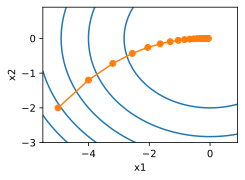

In [9]:
"""
然后，观察学习率为0.1时自变量的迭代轨迹。使用梯度下降对自变量x迭代20次后，

可见最终x的值较接近最优解[0,0][0,0]。
"""
eta = 0.1

def f_2d(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)

show_trace_2d(f_2d, train_2d(gd_2d))


epoch 20, x1 -0.316638, x2 -0.117459


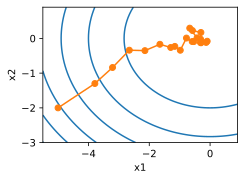

In [10]:
"""
下面我们通过在梯度中添加均值为0的随机噪声来模拟随机梯度下降，以此来比较它与梯度下降的区别。

"""
def sgd_2d(x1, x2, s1, s2):
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)),
            x2 - eta * (4 * x2 + np.random.normal(0.1)), 0, 0)

show_trace_2d(f_2d, train_2d(sgd_2d))


epoch 20, x1 -0.943467, x2 -0.000073


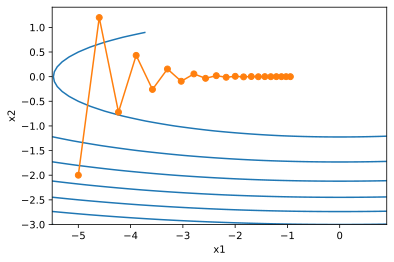

In [11]:
"""梯度下降的问题"""

%matplotlib inline
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l
import torch

eta = 0.4 # 学习率

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1 -0.387814, x2 -1673.365109


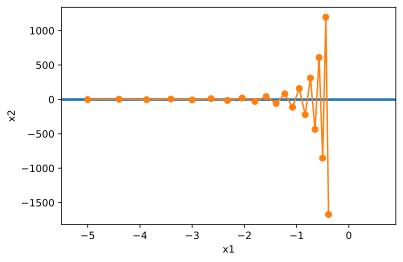

In [13]:
"""
可以看到，同一位置上，目标函数在竖直方向（x2轴方向）比在水平方向（x1轴方向）的斜率的绝对值更大。
因此，给定学习率，梯度下降迭代自变量时会使自变量在竖直方向比在水平方向移动幅度更大。
那么，我们需要一个较小的学习率从而避免自变量在竖直方向上越过目标函数最优解。
然而，这会造成自变量在水平方向上朝最优解移动变慢。
"""

"""
当学习率变大时
"""

eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))


In [14]:
"""
此时自变量在竖直方向不断越过最优解并逐渐发散
"""

'\n此时自变量在竖直方向不断越过最优解并逐渐发散\n'

epoch 20, x1 -0.062843, x2 0.001202


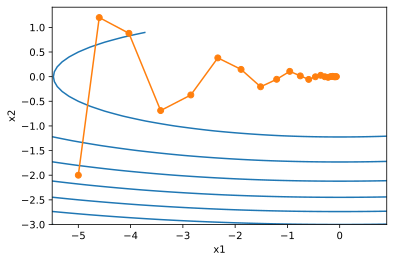

In [15]:
"""
梯度下降在使用动量法后的迭代轨迹
"""
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

eta, gamma = 0.4, 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))


epoch 20, x1 0.007188, x2 0.002553


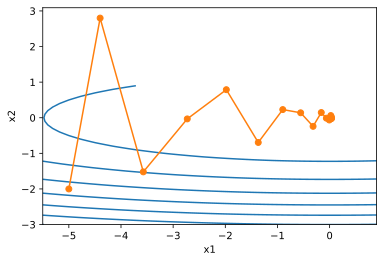

In [16]:
"""
使用学习率0.6 也不在发散了
"""

eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1 -2.382563, x2 -0.158591


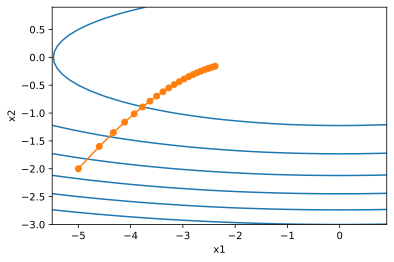

In [17]:
"""
AdaGrad算法
"""

%matplotlib inline
import math
import torch
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

def adagrad_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6  # 前两项为自变量梯度
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1 -0.002295, x2 -0.000000


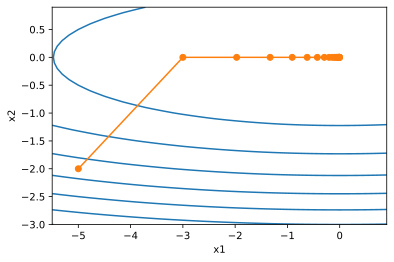

In [18]:
"""
下面将学习率增大到2。可以看到自变量更为迅速地逼近了最优解。

"""
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))


epoch 20, x1 -0.010599, x2 0.000000


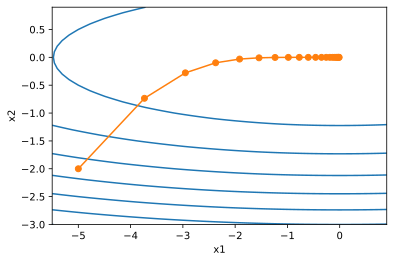

In [19]:
"""
RMSProp
"""

%matplotlib inline
import math
import torch
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))